In [1]:
import pandas as pd
import numpy as np
import nltk


In [2]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
data=pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
print(data.head())

  class                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
data.isnull().any()

class      False
message    False
dtype: bool

In [7]:
data.shape

(5572, 2)

<AxesSubplot:>

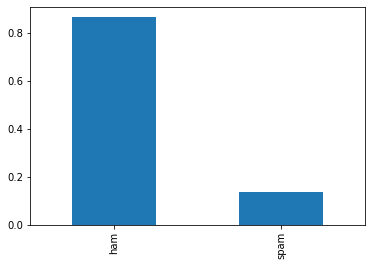

In [8]:
data["class"].value_counts(normalize=True).plot.bar()

## Text Processing
1.Removing all special characters<br>
2.lowecase all letters<br>
3.removing stopwords<br>
4.Lemmatize

In [9]:
data_list=list(data["message"])

In [10]:
l=WordNetLemmatizer()
mess=[]
for i in range(len(data_list)):
    r=re.sub('[^a-zA-Z]'," ",data_list[i])
    r=r.lower()
    r=r.split()
    r=[word for word in r if word not in stopwords.words("english")]
    r=[l.lemmatize(word) for word in r]
    r=" ".join(r)
    mess.append(r)
data["message"]=mess
data.head()

,class,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [11]:
x=data["message"]
y=data["class"]

## splitting of the data 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4457,) (4457,)
(1115,) (1115,)


## Bag of Word

In [13]:
bow=CountVectorizer()
x_train=bow.fit_transform(x_train)
print(x_train.shape,type(x_train))

(4457, 6202) <class 'scipy.sparse._csr.csr_matrix'>


In [14]:
x_test=bow.transform(x_test)
print(x_test.shape,type(x_test))

(1115, 6202) <class 'scipy.sparse._csr.csr_matrix'>


## applying Logistic Regression on Bag of Word

In [15]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [16]:
pred=lr.predict(x_test)

In [17]:
pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

## Plotting Confusion matrix

In [18]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,pred), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,965,1
spam,21,128


In [19]:
print("Score on training data",lr.score(x_train,y_train))
print("Score on testing data",lr.score(x_test,y_test))

Score on training data 0.9946152120260264
Score on testing data 0.9802690582959641


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4457,) (4457,)
(1115,) (1115,)


## TfIdfVectorizer

In [22]:
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(x_train)

In [23]:
print(type(x_train))

<class 'scipy.sparse._csr.csr_matrix'>


In [24]:
x_test=tfidf.transform(x_test)
print(type(x_test))

<class 'scipy.sparse._csr.csr_matrix'>


## Logistic Regression on TfidfVectorizer

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
print("score on training data",lr.score(x_train,y_train))
print("score on testing data",lr.score(x_test,y_test))


score on training data 0.971729863136639
score on testing data 0.968609865470852


In [27]:
pred=lr.predict(x_test)

## Confusion matrix

In [28]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,pred), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,963,3
spam,32,117


In [29]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [30]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "training score","testing score"])
  
# Add rows
myTable.add_row(["Logistic Regression(Bag of words)", "0.99", "0.98"])
myTable.add_row(["Logistic Regression(TfidfVectorizer)", "0.97", "0.96"])
print(myTable)


+--------------------------------------+----------------+---------------+
|              Algorithm               | training score | testing score |
+--------------------------------------+----------------+---------------+
|  Logistic Regression(Bag of words)   |      0.99      |      0.98     |
| Logistic Regression(TfidfVectorizer) |      0.97      |      0.96     |
+--------------------------------------+----------------+---------------+
